# ALLSTATE CLAIMS SEVERITY

In [79]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn import neighbors, datasets, ensemble, cross_validation, utils
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from sklearn.cross_validation import cross_val_score
from scipy import stats

## EXPLORATORY DATA ANALYSIS

Note: Only doing on Train for now, since we will be testing/validating our model on soley train dataset.

First, we will find how many unique values there are in each column containing "cat#", and list out in an array what those unique values are. Hopefully by these counts we are able to find some type of pattern!

In [80]:
#Read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Find unique values
cat_names = list(train)
for name in cat_names :
    if name.find("cat") != -1 :
        print(name, ":", train[name].unique(), "Total unique values: ", len(train[name].unique()))

cat1 : ['A' 'B'] Total unique values:  2
cat2 : ['B' 'A'] Total unique values:  2
cat3 : ['A' 'B'] Total unique values:  2
cat4 : ['B' 'A'] Total unique values:  2
cat5 : ['A' 'B'] Total unique values:  2
cat6 : ['A' 'B'] Total unique values:  2
cat7 : ['A' 'B'] Total unique values:  2
cat8 : ['A' 'B'] Total unique values:  2
cat9 : ['B' 'A'] Total unique values:  2
cat10 : ['A' 'B'] Total unique values:  2
cat11 : ['B' 'A'] Total unique values:  2
cat12 : ['A' 'B'] Total unique values:  2
cat13 : ['A' 'B'] Total unique values:  2
cat14 : ['A' 'B'] Total unique values:  2
cat15 : ['A' 'B'] Total unique values:  2
cat16 : ['A' 'B'] Total unique values:  2
cat17 : ['A' 'B'] Total unique values:  2
cat18 : ['A' 'B'] Total unique values:  2
cat19 : ['A' 'B'] Total unique values:  2
cat20 : ['A' 'B'] Total unique values:  2
cat21 : ['A' 'B'] Total unique values:  2
cat22 : ['A' 'B'] Total unique values:  2
cat23 : ['B' 'A'] Total unique values:  2
cat24 : ['A' 'B'] Total unique values:  2
c

From this analysis we can speculate:

* columns "cat1" through "cat72" might be True/False or Yes/No

* columns "cat73" through "cat76" might be Low/Medium/High values, such as income class or the like with 3 categories

* columns "cat77" through "cat88" also seem to be category-based, with 4 categories each

* specifically for column 112, it may represent states as there is 51 unique values.

Now, let's also check some statistics about quantitative variables.

In [4]:
#Basic Statistics
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [5]:
#Skewness of Continuous Variables
train.skew()

id       -0.002155
cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64

We can clearly see there is high skew factor in loss - let's check what the histogram of it looks like.

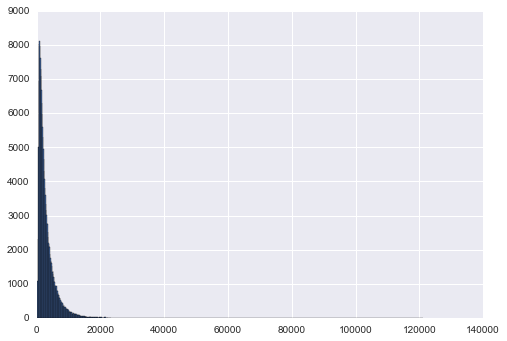

In [5]:
# histogram of loss
train['loss'].hist(bins=1000)

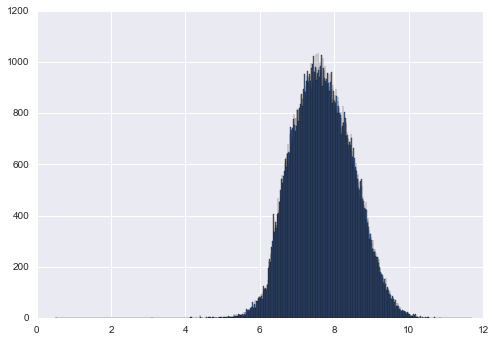

In [6]:
# looks not very normal. let's log(1+x) it
np.log1p(train['loss']).hist(bins=1000)

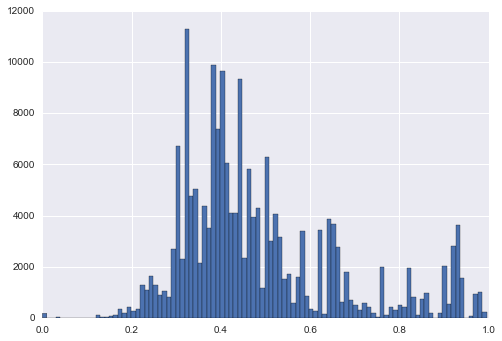

In [7]:
#How about cont9, the highest-skewed feature?
train['cont9'].hist(bins=100)

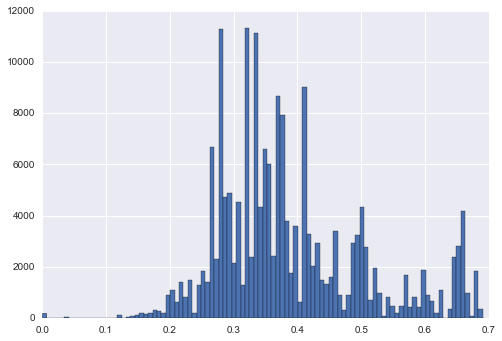

In [8]:
#Try long(1+x) to see if there is major improvements?
np.log1p(train['cont9']).hist(bins=100)

Skew of the loss function was much improved through log(1+x)'ing it, but not cont9, the highest-skewed feature. So for now let's keep in mind to log(1+x) the loss variable (our response variable).

## FEATURE ENGINEERING

First, let's do the simple things: Unskew loss:

In [81]:
train['loss'] = np.log1p(train['loss'])

Now, let us fill in the missing variables in continuous variables, with their means.

In [10]:
#Just checking: Are any values missing?
train.isnull().values.any()

False

Since no values are missing, no need to fill in NAN's with means.

In [15]:
#No values missing, no need to do this:
#train = train.fillna(train.mean())

Let's see which variables are correlated/unnecessary variables and drop them:

In [11]:
#First only getting continuous variable columns
cont_columns = []

for i in train.columns:
    if train[i].dtype == 'float':
        cont_columns.append(i)
cont_columns

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14',
 'loss']

In [12]:
train.loc[:, cont_columns].corr()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
cont1,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688,-0.007335
cont2,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584,0.104666
cont3,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592,0.081548
cont4,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445,-0.027523
cont5,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638,-0.014958
cont6,0.758315,0.015864,-0.349278,0.220932,-0.149810,1.000000,0.658918,0.437437,0.797544,0.883351,0.773745,0.785144,0.815091,0.042178,0.031517
cont7,0.367384,0.048187,0.097516,-0.115064,-0.249344,0.658918,1.000000,0.142042,0.384343,0.492621,0.747108,0.742712,0.288395,0.022286,0.085095
cont8,0.361163,0.137468,-0.185432,0.528740,0.009015,0.437437,0.142042,1.000000,0.452658,0.336588,0.302381,0.315904,0.476402,0.043539,0.032042
cont9,0.929912,-0.032729,-0.417054,0.328961,-0.088202,0.797544,0.384343,0.452658,1.000000,0.785697,0.608000,0.626656,0.642028,0.074154,0.017417
cont10,0.808551,0.063526,-0.325562,0.283294,-0.064967,0.883351,0.492621,0.336588,0.785697,1.000000,0.702896,0.713812,0.707876,0.041808,0.010604


Correlated Variables:
* cont1/cont9
* cont1/cont10
* cont6 with a lot of variables, just remove
* cont7 with cont11/12
* cont9 with cont10
* cont10 with a lotta variables
* cont 11 with cont12
* cont6 with cont13

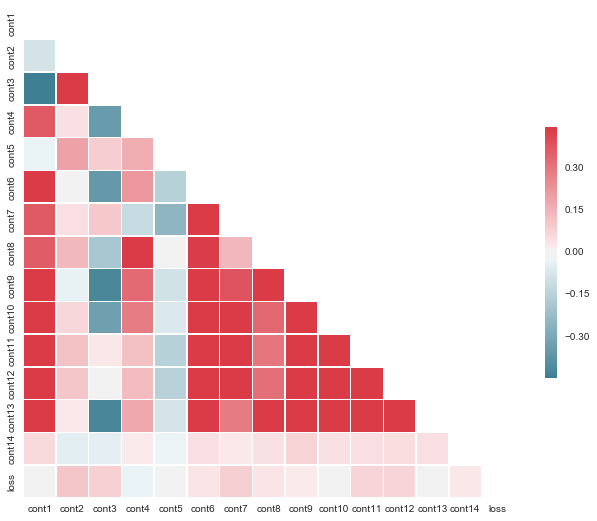

In [13]:
#This code was taken and modified from Kaggle user "denoiser"'s kernel "Simple EDA - feature transformations"

# Compute the correlation matrix
corr = train[cont_columns].corr()

sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

By the looks of the previous two analyses, the most uncorrelated 'cont' variables that would serve as better predictors are: 

* cont2, cont3, cont4, cont5, and cont14 

In [82]:
#Knock out the overly correlated columns
unwanted_list = ['id', 'cont1','cont6','cont7','cont8','cont9','cont10', 'cont11','cont12','cont13']
train.drop(unwanted_list, axis = 1, inplace = True)

In [83]:
#For some reason the above code produces an error, but the action is done here anyways, 
#as verified by taking a peek at the new training dataset
train.head(3)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat113,cat114,cat115,cat116,cont2,cont3,cont4,cont5,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,...,S,A,O,LB,0.245921,0.187583,0.789639,0.310061,0.714843,7.702637
1,A,B,A,A,A,A,A,A,B,B,...,BM,A,O,DP,0.737068,0.592681,0.614134,0.885834,0.304496,7.158203
2,A,B,A,A,B,A,A,A,B,B,...,AF,A,I,GK,0.358319,0.484196,0.236924,0.397069,0.774425,8.008396


We took a look at the recommended transformations on categorical variables given in the kernel "Simple EDA - feature transformations"by user 'denoiser', and applied these transformations on the training set in the cont categories that we kept.

In [84]:
#Apply appropriate transformations on the columns we want -- gosh, I sound like a commercial lol

train['cont2'] = np.tan(train['cont2'])
train['cont4'] = stats.boxcox(train['cont4'])[0]
train['cont5'] = stats.boxcox(train['cont5'])[0]
train.head(3)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat113,cat114,cat115,cat116,cont2,cont3,cont4,cont5,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,...,S,A,O,LB,0.251001,0.187583,-0.229485,-1.675163,0.714843,7.702637
1,A,B,A,A,A,A,A,A,B,B,...,BM,A,O,DP,0.907727,0.592681,-0.459587,-0.125581,0.304496,7.158203
2,A,B,A,A,B,A,A,A,B,B,...,AF,A,I,GK,0.374485,0.484196,-1.213687,-1.221212,0.774425,8.008396


Next, let's create one-hot encodings for categorical variables.

In [85]:
#drop_first = True to remove perfect multicollinearity
train = pd.get_dummies(train, drop_first=True)

## PREPARING DATA

In [86]:
X = train.drop('loss', axis = 1)
Y = train['loss']
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=1)

## LINEAR REGRESSION

In [87]:
from sklearn import linear_model

In [88]:
#Just checking the shape of train and test shape for validation
print("Local train shape: ", X_train.shape)
print("Local test shape: ", X_val.shape)

Local train shape:  (150654, 1028)
Local test shape:  (37664, 1028)


Now let us run the model!

In [89]:
clf = linear_model.LinearRegression()
clf.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's cross validate the model and see if it's robust.

In [41]:
#Function for cross-validation scores
def cv_stats(cv_score):
    """ Returns the mean and standard deviation in a readable format"""
    mean = np.mean(cv_score)
    std = np.std(cv_score)
    return mean, std

In [45]:
clf_score = cross_val_score(clf, X_train, Y_train, cv = 5)
cv_stats(clf_score)

(0.51487530645278956, 0.0039174138628955387)

Let's try running this model for local_test or local validation.

In [90]:
local_y_pred = clf.predict(X_val)
local_y_pred[0:5]

array([ 8.04342425,  8.74053848,  7.09312057,  6.84697807,  6.88411522])

Converting log(1+x)'ed scores back into actual loss response variables to check for MAE.

In [91]:
#Outliers?
local_y_pred[np.isinf(np.expm1(local_y_pred))]

array([  3.88046867e+08,   3.88046866e+08,   1.62625519e+08,
         1.21159320e+08,   1.21159320e+08,   1.21159320e+08,
         1.21159322e+08,   4.67393106e+08,   3.75377515e+08,
         6.39100028e+07])

In [65]:
#Removing outliers
local_y_preds = local_y_pred[np.isfinite(np.expm1(local_y_pred))]
Y_val = Y_val[np.isfinite(np.expm1(local_y_pred))]

In [66]:
local_lin_mae = mean_absolute_error(np.expm1(Y_val), np.expm1(local_y_preds))
local_lin_mae

1.5493421772584319e+107

## RANDOM FOREST

Linear Regression ain't good enough, so Random Forest it is: recall that from cat112, we believe that the data can be separated by state (51, including DC). So let's set the n_estimators to 51.

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor(n_estimators=51, random_state = 123, n_jobs = 3)
rf.fit(X_train,Y_train)
preds = rf.predict(X_val)
preds[0:5]

KeyboardInterrupt: 

In [39]:
local_rf_mae = mean_absolute_error(np.expm1(Y_val), np.expm1(preds))
local_rf_mae

NameError: name 'preds' is not defined

## MAKING A SUBMISSION

Feature Engineering Test Data:

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [27]:
#Re-preparing data for global/total dataset
Y_train = np.log1p(train['loss'])
Y_train.head()

0    7.702637
1    7.158203
2    8.008396
3    6.846784
4    7.924742
Name: loss, dtype: float64

In [11]:
data = pd.concat([train, test], axis = 0)
ID = test['id']
unwanted_list = ['id', 'cont1','cont6','cont7','cont8','cont9','cont10', 'cont11','cont12','cont13']
data.drop(unwanted_list, axis = 1, inplace = True)
data['cont2'] = np.tan(data['cont2'])
data['cont4'] = stats.boxcox(data['cont4'])[0]
data['cont5'] = stats.boxcox(data['cont5'])[0]
data = pd.get_dummies(data, drop_first=True) 
data.shape

(313864, 1066)

In [23]:
X_train = data[pd.notnull(data['loss'])].drop('loss', axis = 1)
X_train.shape

(188318, 1065)

Training Model with all train.csv datapoints:

In [28]:
best_model = RandomForestRegressor(n_estimators = 51, random_state = 123, n_jobs = 3)
best_model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=51, n_jobs=3, oob_score=False, random_state=123,
           verbose=0, warm_start=False)

Making Submission:

In [35]:
X_test = data[pd.isnull(data['loss'])].drop('loss', axis = 1)
predictions = np.expm1(best_model.predict(X_test))
predictions[0:5]

array([ 1982.601879  ,  2311.00095181,  9406.93242042,  5280.8919217 ,
         718.73366417])

In [40]:
with open("submission_new.csv", "w") as subfile:
    subfile.write("id,loss\n")
    for i, pred in enumerate(list(predictions)):
        subfile.write("%s,%s\n"%(ID[i],pred))

Feature Importance:

In [93]:
fimps = DataFrame({"fimps": best_model.feature_importances_},index=test.columns.values[0:])
fimps.plot(kind='bar')

NameError: name 'best_model' is not defined

## SIDE: XGBOOST

In [39]:
from xgboost import XGBRegressor

ImportError: No module named 'xgboost'

In [38]:
xgb = XGBRegressor(n_estimators= 51, seed = 124)
xgb.fit(X_train,Y_train)

NameError: name 'XGBRegressor' is not defined

In [ ]:
xgb_preds = np.expm1(xgb.predict(test))
xgb_preds[0:5]

In [ ]:
with open("xgb_submission.csv", "w") as subfile:
    subfile.write("id,loss\n")
    for i, pred in enumerate(list(predictions)):
        subfile.write("%s,%s\n"%(ID[i],pred))